<a href="https://colab.research.google.com/github/jjzsilva9/vico/blob/main/VICO_Week_7_2024_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VICO Week 7 Practical: Monte Carlo Integration and path tracing



---
Before starting, ensure you have completed the Week 6 practical.

##Part 1: Monte Carlo integration (tasks 1-3)

In this section, we will apply the basic Monte Carlo estimator and explore importance sampling to estimate the integrals of various functions. Additionally, we will examine an alternative technique for integration.

In [2]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2
import numpy as np
import matplotlib.pyplot as plt

###Task 1: Basic Monte Carlo estimator

Your task is to use uniformly distributed samples to estimate the definite integral $\int_{0}^{\pi} \sin(x) \,dx$, using $N = 10$, $100$, $1000$ and $10000$ samples.

Follow these steps for each sample size (N):
1.   Perform the estimation 30 times
2.   Record the relative error for each iteration.
3.   Calculate the average of the relative errors from the 30 runs.

After completing the above for each N, create a plot that displays the average relative error as a function of the number of samples.

In [4]:
#

N = 1000; # Number of samples. Then use 100, 1000 and 10000 samples.

# evaluate the given definite integral analytically: it's our ground truth!
# if you wish, you can use an online integral calculator, for example https://www.integral-calculator.com/
gt_integral = 2

#basic estimator

#initialise the value of the variable(s) you are going to use inside the following foor loop
total_error = 0
for estimate in range(30):
  sum = 0
  for i in range(N):
    x = np.random.random() * np.pi # generate a random sample as mentioned in the task description
    sum += np.sin(x)

  #compute the Monte Carlo estimator, then the relative error.
  estimated_integral = sum/N * np.pi
  error = np.abs(1 - gt_integral/estimated_integral)

  total_error += error
print(total_error/30)

0.011013444643808816


###Task 2: The rejection method.

This method, often referred to as the "dartboard method," works by enclosing the function $f(x)$ within a rectangle. Then, you generate $N$ random points that land inside this rectangle. By calculating the proportion of points that fall under the curve of the function, compared to the total number of points
N, you can estimate the area beneath the curve, which equates to the integral of the function. For a detailed example, refer to the end of [section 13.3.2 of the PBR book](https://www.pbr-book.org/3ed-2018/Monte_Carlo_Integration/Sampling_Random_Variables#TheRejectionMethod).

Apply the dartboard method to estimate the integral provided in *Task 1*. Use the same numbers of samples and repetitions. Afterward, analyse the results and discuss which method you would prefer for estimating integrals and why.

In [8]:

N=10000 # Number of samples. Then use 100, 1000 and 10000 samples.

gt_integral = 2

# initialise the counter for the number of times we "hit the dartboard"
nHit=0

for i in range(N):
    # generate the coordinates of the random point
    xCoord = np.random.random() * np.pi
    yCoord = np.random.random()
    # check whether the "dart" has hit the "target"
    if yCoord <= np.sin(xCoord):
        nHit+=1

# estimate the integral based on the number of times the target has been hit
integral = nHit/N * np.pi

print(integral)

1.9977387684177494


###Task 3: Monte Carlo estimator using importance sampling.

Your objective is to estimate the definite integral of the function $f(x) = \cos(x)e^{-20x}$ over the interval $[0,1]$. If you encounter any difficulties with the calculation of the integral, you may use an [online tool](https://www.integral-calculator.com/).

For generating non-uniformly distributed samples, use a probability density function (PDF) where the likelihood of generating a sample $x$ is proportional to $g(x) = e^{−20x}$.
You will first need to determine the normalisation constant $c$, by integrating $g$ over the interval $[0,1]$.

After you have completed your estimations, compare the results with those obtained using the basic Monte Carlo estimator from *Task 1*, ensuring you use the same number of samples for a fair comparison.

In [16]:
# Number of samples.
N = 100;

# evaluate the given definite integral analytically: it's our ground truth!
gt_integral = 0.04987531166948

#basic estimator; initialisation
estimated_integral_basic = 0;
for i in range(N):
  x = np.random.random()
  estimated_integral_basic += np.cos(x) * np.e**(-20*x)

#compute the basic Monte Carlo estimator
estimated_integral_basic = estimated_integral_basic / N

# Importance Sampling; initialisation
estimated_integral_IS = 0

c = 1/gt_integral

for i in range(N):
  # generate u and x using the inversion method: u is drawn uniformly from [0,1], x by using g^-1(u), where g^-1(x) is the inverse of g(x)
  u = np.random.random()
  x = np.log(u)/-20
  # your code to compute the summation term of the Importance Sampling Monte Carlo estimator goes here
  estimated_integral_IS += (np.cos(x) * np.e**(-20*x)) / (c*np.e**(-20*x))

#compute the Monte Carlo estimator
estimated_integral_IS = estimated_integral_IS / N

print(estimated_integral_basic)
print(estimated_integral_IS)



0.07708290292295611
0.04973398485723401


##Part 2: Path tracing in Mitsuba (tasks 4 and 5)



---



###Task 4: Path tracing in Mitsuba

For this task, familiarise yourself with the path tracing integrator, the independent sampler, and the "roughconductor" BRDF in the Mitsuba [documentation](https://www.mitsuba-renderer.org/releases/current/documentation_lowres.pdf). Using the [scene](https://www.dropbox.com/s/ae5xpitkpel9kgt/VICO_scene_01.rar?dl=0) from Week 5, make the following modifications:

1.   Use the roughconductor BRDF with the GGX distribution to replicate an isotropic gold (Au) surface with a microfacet RMS slope of 0.3.
2.   Illuminate the scene solely with the environment map, omitting the point light source.
3.   Switch from "bdpt" to standard path tracing.
4.   Replace the "ldsampler" with the "independent" sampler.

With these new settings in place, render the image using 16, 64, and finally 256 samples. Save your rendered images in EXR format or as a numpy film. Then, upload the images to Colab, convert them to grayscale, and crop a square area within one of the diffuse patches on the checkerboard.

Analyse whether the standard deviation of the pixel values in the selected patch decreases in proportion to $1/sqrt(N)$, consistent with our discussions in the lecture. This means that if you graph the standard deviation of the patches against $1/sqrt(N_{samples})$, the data points should approximate a straight line.

For your analysis, you may use a patch with the following coordinates:

```
top_left_y = 210
top_left_x = 430
h = 40
w = 50
```



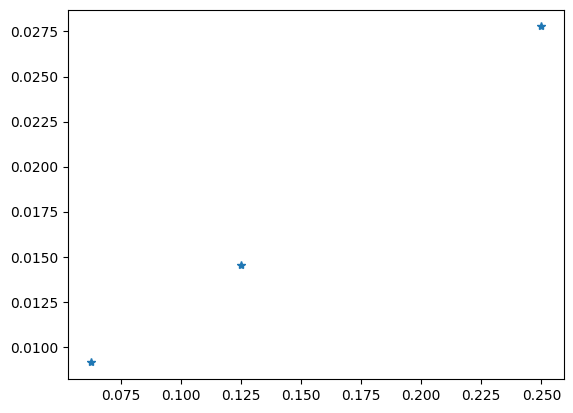

In [17]:
# Save the images, then load them in Colab!
# Let's say you named the images 16_samples.exr, 64_samples.exr and 256_samples.exr

top_left_y = 210
top_left_x = 430
h = 40
w = 50

img_16 = cv2.cvtColor(cv2.imread("16samples.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH),cv2.COLOR_BGR2GRAY) #complete this line
img_64 = cv2.cvtColor(cv2.imread("64samples.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH),cv2.COLOR_BGR2GRAY)
img_256 = cv2.cvtColor(cv2.imread("256samples.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH),cv2.COLOR_BGR2GRAY)

patch_16 = img_16[top_left_y:(top_left_y+h), top_left_x:(top_left_x+w)]
patch_64 = img_64[top_left_y:(top_left_y+h), top_left_x:(top_left_x+w)]
patch_256 = img_256[top_left_y:(top_left_y+h), top_left_x:(top_left_x+w)]

std_16 = np.std(patch_16)
std_64 = np.std(patch_64)
std_256 = np.std(patch_256)

# do the same with the other two images, then plot the data as required
plt.plot([1/np.sqrt(16), 1/np.sqrt(64), 1/np.sqrt(256)],[std_16, std_64, std_256],'*')



---


###Task 5: Comparison Between Non-Photorealistic and Path-Traced Rendering.
In this task, we will revisit MatCaps, which we explored in Week 6. A critical limitation of MatCaps is their omission of global illumination effects, such as inter-reflections and shadows. This is less evident with simpler shapes (like the cat figurine we looked at), but for more complex geometries, such as the XYZ RGB Inc. Dragon, the absence of these effects is quite apparent. You can see examples of complex shapes at  [The Stanford 3D Scanning Repository](http://graphics.stanford.edu/data/3Dscanrep/), which hosts a collection of 3D objects commonly used in computer graphics.

The disparity in rendering quality between MatCaps and more sophisticated methods becomes somewhat less pronounced when using environment map illumination. Can you think of a reason why this might be the case?

Now, let's examine how the dragon looks when rendered in Mitsuba compared to its MatCap equivalent. To do this, create a map that highlights the color differences using the $\Delta E_{76}$ equation (refer back to Week 2 on Colour Differences). Make sure to apply the mask to exclude the background from your calculations.

Consider the white point for your analysis: which one should you choose? A good starting point might be to look at the environment map used during rendering.

Finally, assess the color difference map: what proportion of pixels exhibit differences that exceed the Just Noticeable Difference threshold?

---


***The following steps are optional*** and only necessary if you choose to generate the Matcap, Matcap rendering of the dragon, and its path-traced rendering in Mitsuba yourself.

Using this [environment map](https://www.dropbox.com/s/icj6znnfxu4oe0z/envmap.exr), proceed with the following:

1.   Render a new Matcap.
2.   Apply the new Matcap to the dragon, utilizing the normal map provided and following the algorithm from Week 6's Practical, Task 3.
3.   Produce a rendering of the dragon in Mitsuba.

 (For the required xml file, geometry, and environment map for this task, please refer to the resources available [here](https://www.dropbox.com/s/78u8jfhbvjcqmem/dragon_assets.zip)).




---





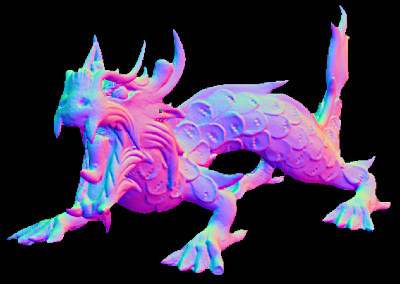

--2024-12-22 15:30:12--  https://www.dropbox.com/s/6gagz2wq40zanxf/matcap_environment_map.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/shexvfl12txjvg3845kpt/matcap_environment_map.png?rlkey=qc4mq374qkj26njtc8q2c5944 [following]
--2024-12-22 15:30:12--  https://www.dropbox.com/scl/fi/shexvfl12txjvg3845kpt/matcap_environment_map.png?rlkey=qc4mq374qkj26njtc8q2c5944
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc72961a529876305611d8ba3342.dl.dropboxusercontent.com/cd/0/inline/CgsguEmX7aF9FEZXaD_Ve_VVwTjvaThaBVYCTM6DWoMoHfOa-RM2A2cF8L5v4wdp_kKVrrksRSUm90g4hbMVsz2FaoP54Cm_QC_S7Opq4wZ50WYHivCLFeER7c7xxrhSwoW62letnyjTBNICbUibL5c0/file# [following]
--2024-12-22 15:30:13--  https://uc72961a529876305611d8b

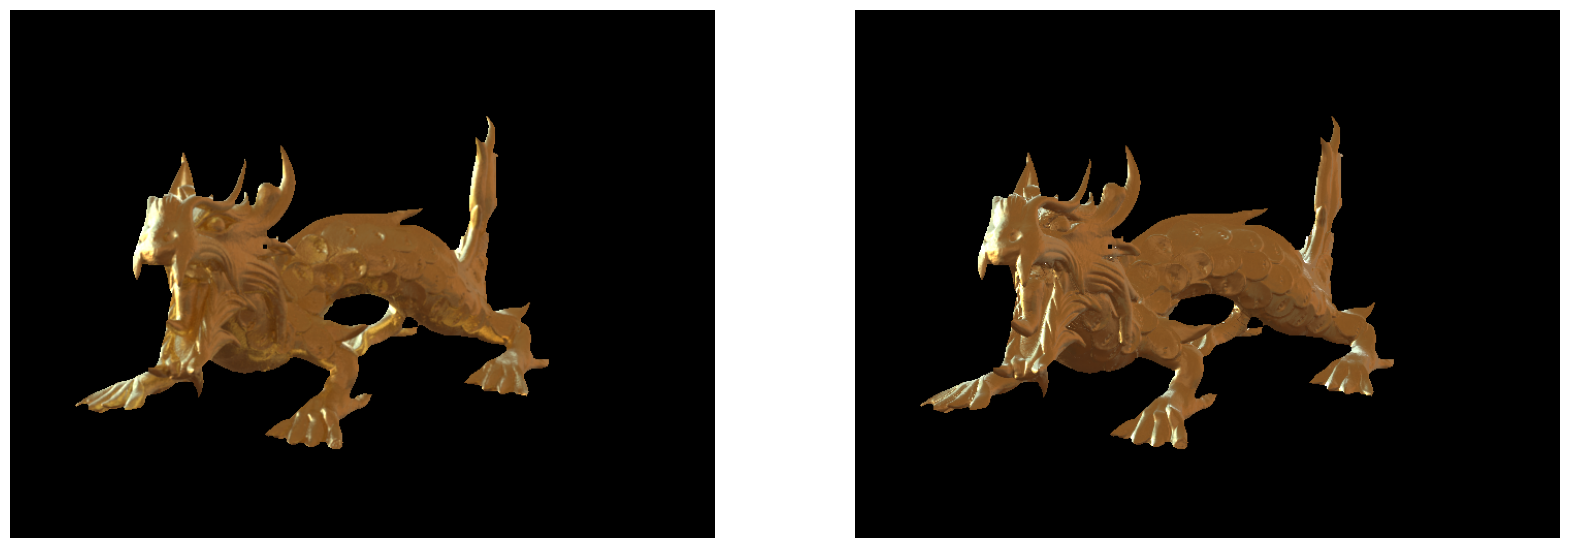

In [18]:
# link to the matcap
!wget https://www.dropbox.com/s/6gagz2wq40zanxf/matcap_environment_map.png

# link to the dragon rendered in mitsuba
!wget https://www.dropbox.com/s/x36y32o6ghi2gvj/dragon_environment_map.png

# link to the dragon rendered using the matcap
!wget https://www.dropbox.com/s/qyt56r7np2odyut/dragon_matcap.npy

# link to the mask for the dragon
!wget https://www.dropbox.com/s/c55ud6zb4e8ni05/dragon_mask.png


dragon_mask = cv2.imread('dragon_mask.png', cv2.IMREAD_GRAYSCALE)

dragon_ground_truth = cv2.cvtColor(cv2.imread('dragon_environment_map.png'),cv2.COLOR_BGR2RGB)


with open('dragon_matcap.npy', 'rb') as f:
    dragon_matcap = np.load(f)


#apply the mask
for ch in range(3):
  dragon_ground_truth[:,:,ch] = cv2.bitwise_and(dragon_ground_truth[:,:,ch], dragon_mask)

#Let's have a look at the renderings
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(dragon_ground_truth/255)
axes[1].imshow(dragon_matcap/255)
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [ ]:
# it is advisable to convert the images to floating point, as the conversion RGB->LAB performed by OpenCV depends on the data type!
dragon_GT_Lab =dragon_ground_truth.astype(np.float32)/255
rendered_dragon_Lab = dragon_matcap.astype(np.float32)/255

# Your code goes here: convert the images to CIE Lab, then compute the DE74 and visualise the error map